# Problem Statement:

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount,Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above

# The steps which are followed to solve this problem statement :
1.Data Cleaning 
2.Exploratory Data Analysis -Visualization of Data. 
3.model selection depending on problem 
4.evaluating the model using various metrics.
5.Regularising the model with different hyparameter
6.Taking prediction on model with best hyperparameter on test data

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [3]:
df=pd.read_csv('C:/Users/cmscomputers/Desktop/datasets/Loan_project/training_set (1).csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df=df.drop('Loan_ID',axis=1)

In [6]:
df.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Credit_History'].value_counts()           #treating credit_History feature as categorical

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [8]:
df['Credit_History']=df['Credit_History'].fillna(1)

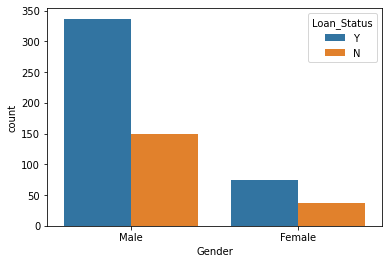

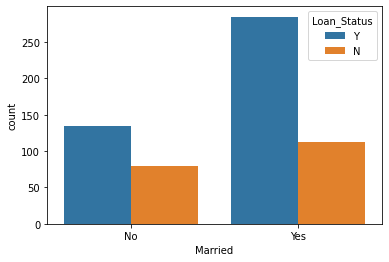

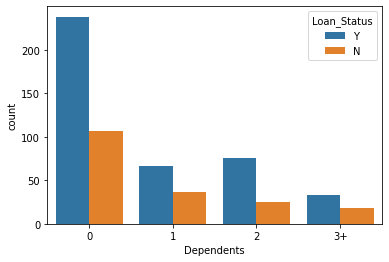

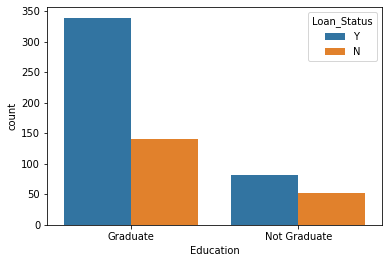

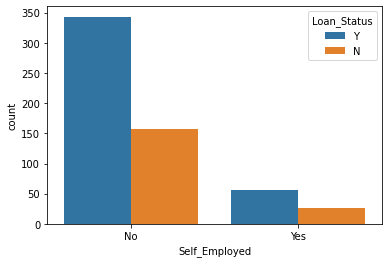

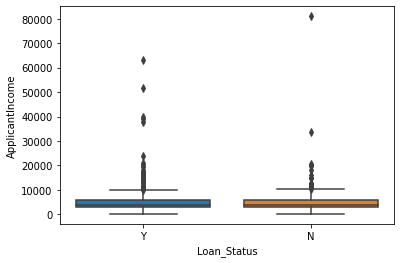

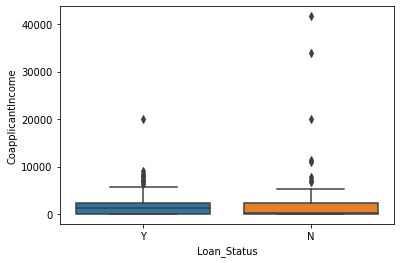

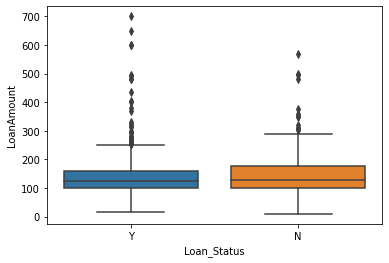

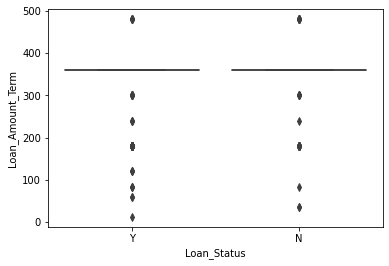

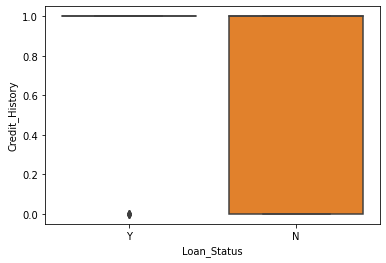

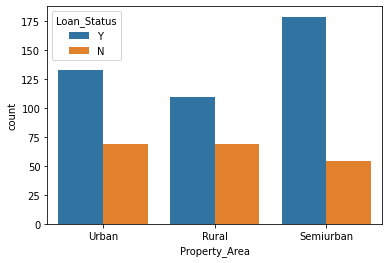

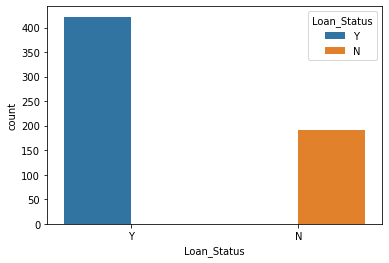

In [9]:
for i in df.columns:
    if(df[i].dtypes=='object'):
        sb.countplot(df[i],hue=df['Loan_Status'])
        plt.show()
    else:
        sb.boxplot(df['Loan_Status'],df[i])
        plt.show()

In [10]:
X=df.drop('Loan_Status',axis=1)
Y=df[['Loan_Status']]

In [11]:
X.isna().sum().sum()

105

In [12]:
cat=[]
con=[]
for i in X:
    if(X[i].dtype =='object'):
        cat.append(i)
    else:
        con.append(i)

In [13]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [14]:
num=Pipeline([
    ('num_fill',SimpleImputer()),
    #('num_scale',MinMaxScaler())
    
])

categorical=Pipeline([
    ("cat_fill",SimpleImputer(strategy='most_frequent',fill_value='missing')),
    ('cat_scale',OneHotEncoder(sparse=False,handle_unknown='ignore'))
    
])

In [15]:
ct=ColumnTransformer([
    ('num',num,con),
    ('categorical',categorical, cat)
])

In [16]:
X=ct.fit_transform(X)
X=pd.DataFrame(X)

In [17]:
X.isna().sum().sum()

0

In [18]:
la=LabelEncoder()
Y=la.fit_transform(Y)
Y.shape

(614,)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=10)

In [20]:
models= {
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "RandomForestClassifier":RandomForestClassifier(),
          "LogisticRegression":LogisticRegression(),
          "AdaboostClassifier": AdaBoostClassifier(DecisionTreeClassifier()) 
} 
      
for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(xtrain,ytrain)
        
        #make predictions
        ytrain_pred=model.predict(xtrain)
        ytest_pred=model.predict(xtest)
        
        #training set performance
        model_train_accuracy=accuracy_score(ytrain,ytrain_pred)
        model_train_f1=f1_score(ytrain,ytrain_pred,average="weighted")
        model_train_precision=precision_score(ytrain,ytrain_pred)
        model_train_recall=recall_score(ytrain,ytrain_pred)
        
        #testing set performances
        model_test_accuracy=accuracy_score(ytest,ytest_pred)
        model_test_f1=f1_score(ytest,ytest_pred,average="weighted")
        model_test_precision=precision_score(ytest,ytest_pred)
        model_test_recall=recall_score(ytest,ytest_pred)
        
        print(list(models.keys())[i])
        
        
        print('Model performances for trainig set')
        print('Accuracy :{:.4f}'.format(model_train_accuracy))
        print('F1_score :{:.4f}'.format(model_train_f1))
        print('Precision_score :{:.4f}'.format(model_test_precision))
        print('Recall :{:.4f}'.format(model_test_recall))
        
        print('----------------------------------')
        
        print('Model performances for testing set')
        print('Accuracy :{:.4f}'.format(model_test_accuracy))
        print('F1_score :{:.4f}'.format(model_test_f1))
        print('Precision_score :{:.4f}'.format(model_test_precision))
        print('Recall :{:.4f}'.format(model_test_recall))
        
        print("="*40)
        print("\n")
        

DecisionTreeClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
Precision_score :0.7952
Recall :0.7586
----------------------------------
Model performances for testing set
Accuracy :0.6911
F1_score :0.6956
Precision_score :0.7952
Recall :0.7586


RandomForestClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
Precision_score :0.7864
Recall :0.9310
----------------------------------
Model performances for testing set
Accuracy :0.7724
F1_score :0.7494
Precision_score :0.7864
Recall :0.9310


LogisticRegression
Model performances for trainig set
Accuracy :0.8147
F1_score :0.7947
Precision_score :0.7870
Recall :0.9770
----------------------------------
Model performances for testing set
Accuracy :0.7967
F1_score :0.7658
Precision_score :0.7870
Recall :0.9770


AdaboostClassifier
Model performances for trainig set
Accuracy :1.0000
F1_score :1.0000
Precision_score :0.8000
Recall :0.7816
----------------------------------
Model performa

In [21]:
#Hyper Parameter training
rf_params = {"max_depth": [2,4,8,12,16,20,25,30],
             "max_features": [2,4,8,'auto'],
             "min_samples_split" :[2,4,8,12,16,20,25,30],
             "min_samples_leaf": [2,4,8,12,16,20,25,30]
            }

In [22]:
#models list for hyper parameter tuning
randomcv_models = [('DecisionTree',DecisionTreeClassifier(),rf_params),
                   ('Random_forest',RandomForestClassifier(),rf_params)
]

In [23]:
#training the model
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=100,
                               cv=4,
                               verbose=2,
                               n_jobs=-1)
    
    random.fit(xtrain,ytrain)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------------------Best Params for =={model_name}-----------------------")
    print(model_param[model_name])

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 4 folds for each of 100 candidates, totalling 400 fits
---------------------Best Params for ==DecisionTree-----------------------
{'min_samples_split': 16, 'min_samples_leaf': 16, 'max_features': 8, 'max_depth': 30}
---------------------Best Params for ==Random_forest-----------------------
{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 8}


# Taking prediction on test data

In [24]:
test=pd.read_csv('C:/Users/cmscomputers/Desktop/datasets/Loan_project/testing_set (1).csv')

In [25]:
test1=ct.fit_transform(test)
test1=pd.DataFrame(test1)
test1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5720.0,0.0,110.0,360.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3076.0,1500.0,126.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5000.0,1800.0,208.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2340.0,2546.0,100.0,360.0,0.825444,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,3276.0,0.0,78.0,360.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009.0,1777.0,113.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
363,4158.0,709.0,115.0,360.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
364,3250.0,1993.0,126.0,360.0,0.825444,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
365,5000.0,2393.0,158.0,360.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
#Creating model using best tuned parameter 
model=RandomForestClassifier(min_samples_split =8,min_samples_leaf=2,max_features= 'auto',max_depth= 20)

In [27]:
model=model.fit(xtrain,ytrain)

In [28]:
pred_LoanStatus=model.predict(test1)

In [29]:
q=[]
for i in pred_LoanStatus:
    if(i == 1):
        q.append('Y')
    else:
        q.append('N')

In [30]:
q

['Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'

In [31]:
test['pred_Loan_status']=q

In [32]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,pred_Loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y
